# Trading on PythonAnywhere For Web & Mobile - Case-Study Part 1

Note: you can install the requirements file for this notebook if you want to install all the libraries at once. Open a new terminal window, navigate to the folder with the "requirements_jupyter.txt" and run the following command:

***pip3 install -r requirements_jupyter.txt***

In [1]:
# !pip3 install -r requirements_jupyter.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load stock market symbols and data

In [3]:
index_symbol = ['^DJI']
stock_symbols = ['BA','GS','UNH','MMM','HD','AAPL','MCD','IBM','CAT','TRV']

In [4]:
# loop through each stock and load the corresponding CSV market file
stock_data_list = []
for stock in index_symbol + stock_symbols:
    tmp = pd.read_csv(stock + '.csv')
    # add stock symbol as new column
    tmp['Symbol'] = stock
    tmp = tmp[['Symbol', 'Date', 'Adj Close']]
    stock_data_list.append(tmp)
    
stock_data = pd.concat(stock_data_list)
stock_data.head()

,Symbol,Date,Adj Close
0,^DJI,2017-04-05,20648.150391
1,^DJI,2017-04-06,20662.949219
2,^DJI,2017-04-07,20656.099609
3,^DJI,2017-04-10,20658.019531
4,^DJI,2017-04-11,20651.300781


## Flatten out data frame

In [5]:
# flatten out data frame
# make each stock symbol into unique column
stock_data = stock_data.pivot('Date','Symbol')
stock_data.columns = stock_data.columns.droplevel()

stock_data.head()

Symbol,AAPL,BA,CAT,GS,HD,IBM,MCD,MMM,TRV,UNH,^DJI
Date,,,,,,,,,,,
2017-04-05,141.777161,172.905151,91.817474,224.784515,143.392029,166.105453,127.264633,185.988541,118.215958,162.975571,20648.150391
2017-04-06,141.422775,173.188293,93.356865,225.752121,143.978745,165.692307,127.010887,185.646362,117.854195,162.945999,20662.949219
2017-04-07,141.107742,174.633438,93.064575,225.001724,143.871185,165.394455,126.825478,185.744141,117.472885,163.616150,20656.099609
2017-04-10,140.940399,173.373825,94.642937,225.998962,144.927246,164.491302,126.844994,185.470398,118.411491,163.083954,20658.019531
2017-04-11,139.424393,174.360031,94.603958,224.863480,144.917465,163.895584,128.035568,185.822357,118.489716,163.428894,20651.300781


## What does a percentage change look and cumulative sum like?

In [6]:
pd.DataFrame({"Price":stock_data['AAPL'], 
              "PercentChange":stock_data['AAPL'].pct_change(),
              "PercentChangeCumSum":stock_data['AAPL'].pct_change().cumsum()}).tail(10)


,Price,PercentChange,PercentChangeCumSum
Date,,,
2018-03-21,171.270004,-0.022655,0.208167
2018-03-22,168.850006,-0.014130,0.194038
2018-03-23,164.940002,-0.023157,0.170881
2018-03-26,172.770004,0.047472,0.218353
2018-03-27,168.339996,-0.025641,0.192712
2018-03-28,166.479996,-0.011049,0.181663
2018-03-29,167.779999,0.007809,0.189471
2018-04-02,166.679993,-0.006556,0.182915
2018-04-03,168.389999,0.010259,0.193174


In [7]:
## Let's truncate the data to the last 3 months of trading (90 days)
stock_data = stock_data.tail(90)

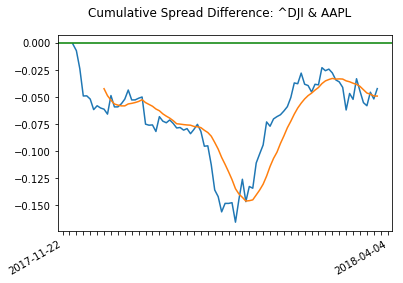

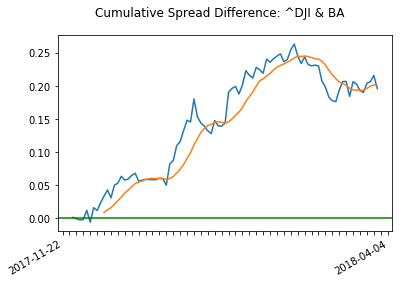

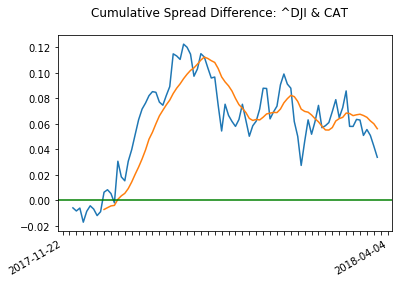

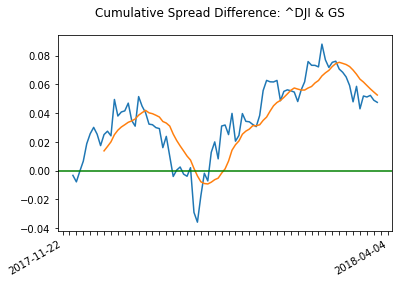

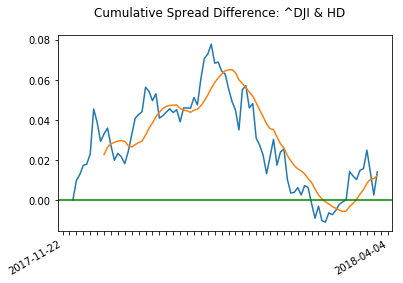

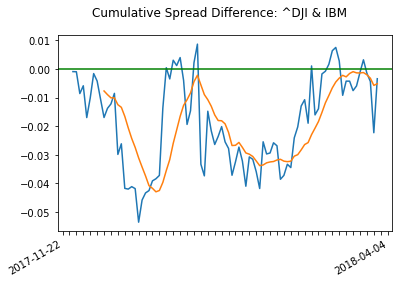

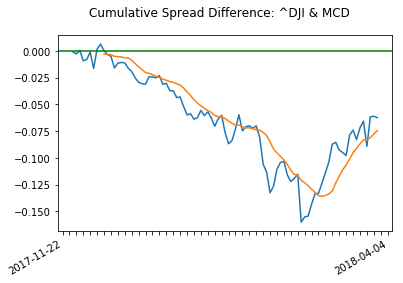

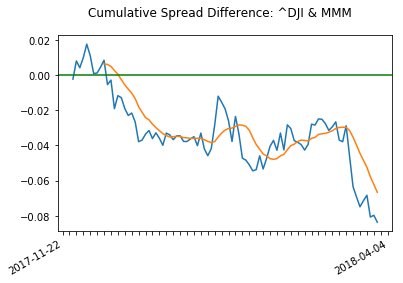

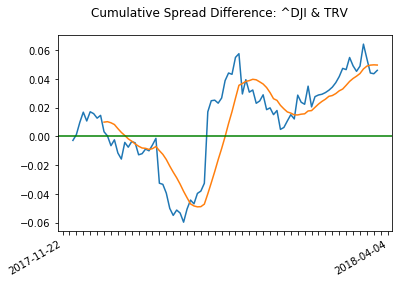

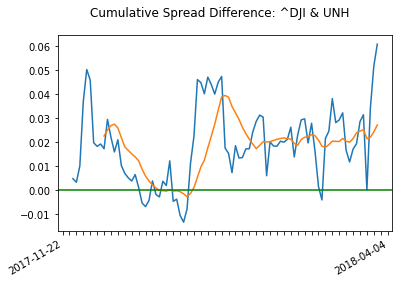

In [8]:
# for stock1 in list(stock_data):

import matplotlib.ticker as mticker
 
stock1 = '^DJI'
temp_series1 = stock_data[stock1].pct_change().cumsum()
for stock2 in list(stock_data):
    # no need to process itself
    if (stock2 != stock1):
        temp_series2 = stock_data[stock2].pct_change().cumsum()
        # we are subtracting the stock minus the index, if stock is strong compared
        # to index, we assume a postive value
        diff = temp_series2 - temp_series1
        # Set up the axes and figure
        fig, ax = plt.subplots()

        ax.plot(temp_series2.index, list(diff))
        # add a rolling mean to smooth out price difference
        ax.plot(diff.rolling(10).mean())
        plt.suptitle('Cumulative Spread Difference: ' + stock1 + ' & ' + stock2)
        
        # add zero line 
        ax.axhline(y=0, color='green', linestyle='-')

        # rotate dates 
        myLocator = mticker.MultipleLocator(2)
        ax.xaxis.set_major_locator(myLocator)
        fig.autofmt_xdate()

        # fix label to only show first and last date
        labels = ['' for item in ax.get_xticklabels()]
        labels[1] = temp_series2.index[0]
        
        # labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
        labels[-2] = temp_series2.index[-1]
        ax.set_xticklabels(labels)

        plt.show()
        

## Calculate spread and get distance for last trading price for each stock

In [9]:
# get both extreme stocks - highest from index and lowest from index
# calculate the distance from 0 line
 
stock1 = '^DJI'
last_distance_from_index = {}
temp_series1 = stock_data[stock1].pct_change().cumsum()
for stock2 in list(stock_data):
    # no need to process itself
    if (stock2 != stock1):
        temp_series2 = stock_data[stock2].pct_change().cumsum() 
        # we are subtracting the stock minus the index, if stock is strong compared
        # to index, we assume a postive value
        diff = list(temp_series2 - temp_series1)
        last_distance_from_index[stock2] = diff[-1]

In [10]:
last_distance_from_index

{'AAPL': -0.042309986580456815,
 'BA': 0.1960194615751124,
 'CAT': 0.03379845694757866,
 'GS': 0.047454711281622486,
 'HD': 0.014178592951754165,
 'IBM': -0.003376107031365594,
 'MCD': -0.06239853566933862,
 'MMM': -0.08366228603707737,
 'TRV': 0.04601871807501723,
 'UNH': 0.060732956928879145}

In [11]:
weakest_symbol = min(last_distance_from_index.items(), key=lambda x: x[1]) 
print('Weakest symbol: %s' % weakest_symbol[0])

Weakest symbol: MMM


In [12]:
strongest_symbol = max(last_distance_from_index.items(), key=lambda x: x[1]) 
print('Strongest symbol: %s' % strongest_symbol[0])

Strongest symbol: BA


## Plot both extremes

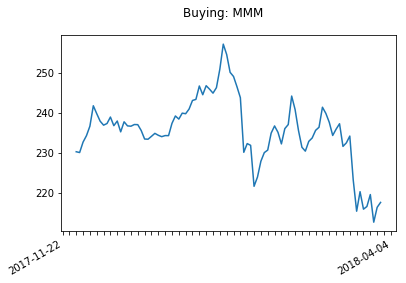

In [13]:
fig, ax = plt.subplots()

ax.plot(temp_series2.index, stock_data[weakest_symbol[0]])
plt.suptitle('Buying: ' + weakest_symbol[0])

# rotate dates 
myLocator = mticker.MultipleLocator(2)
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

# fix label to only show first and last date
labels = ['' for item in ax.get_xticklabels()]
labels[1] = temp_series2.index[0]

# labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
labels[-2] = temp_series2.index[-1]
ax.set_xticklabels(labels)

plt.show()

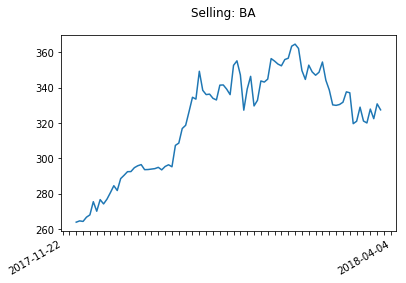

In [14]:
fig, ax = plt.subplots()

ax.plot(temp_series2.index, stock_data[strongest_symbol[0]])
plt.suptitle('Selling: ' + strongest_symbol[0])

# rotate dates 
myLocator = mticker.MultipleLocator(2)
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

# fix label to only show first and last date
labels = ['' for item in ax.get_xticklabels()]
labels[1] = temp_series2.index[0]

# labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
labels[-2] = temp_series2.index[-1]
ax.set_xticklabels(labels)

plt.show()

## Calculate trade sizes

You want to get into the market with equal dollar amounts in both your long and short positions. In other words, you want to be dollar-neutral as much as possible (granted this is harder with smaller budgets or stocks that trade at big values). 

In [15]:
trading_budget = 10000

# get last trading price for both stocks
short_symbol = strongest_symbol[0]
short_last_close = stock_data[strongest_symbol[0]][-1] 
print('Strongest symbol %s, last price: $%f' % (strongest_symbol[0], short_last_close))

long_symbol = weakest_symbol[0]
long_last_close = stock_data[weakest_symbol[0]][-1] 
print('Weakest symbol %s, last price: $%f' % (weakest_symbol[0], long_last_close))


Strongest symbol BA, last price: $327.440002
Weakest symbol MMM, last price: $217.559998


In [16]:
print('For %s, at $%f, you need to short %i shares' %
      (short_symbol, short_last_close, (trading_budget * 0.5) / short_last_close ))

For BA, at $327.440002, you need to short 15 shares


In [17]:
print('For %s, at $%f, you need to buy %i shares' %
      (long_symbol, long_last_close, (trading_budget * 0.5) / long_last_close ))

For MMM, at $217.559998, you need to buy 22 shares


## Let's plot the pair trade and index data

In [18]:
long_trade_df = stock_data[long_symbol].pct_change().cumsum()
short_trade_df = stock_data[short_symbol].pct_change().cumsum()
index_df = stock_data[index_symbol[0]].pct_change().cumsum()

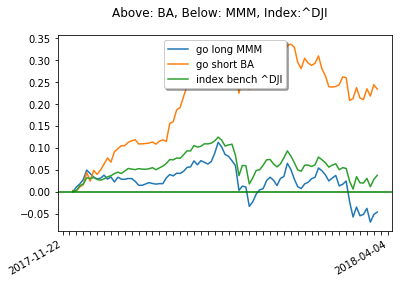

In [19]:
fig, ax = plt.subplots()


ax.plot(long_trade_df.index, long_trade_df, label='go long ' + long_symbol)
ax.plot(long_trade_df.index, short_trade_df, label='go short ' + short_symbol)
ax.plot(long_trade_df.index, index_df, label='index bench ' + index_symbol[0])
legend = ax.legend(loc='upper center', shadow=True)

plt.suptitle('Above: ' + short_symbol + ', Below: ' + long_symbol + ', Index:' + index_symbol[0])

# add zero line 
ax.axhline(y=0, color='green', linestyle='-')

# rotate dates 
myLocator = mticker.MultipleLocator(2)
ax.xaxis.set_major_locator(myLocator)
fig.autofmt_xdate()

# fix label to only show first and last date
labels = ['' for item in ax.get_xticklabels()]
labels[1] = temp_series2.index[0]

# labels[int(len(labels)/2)] = temp_series2.index[int(len(labels)/2)]
labels[-2] = temp_series2.index[-1]
ax.set_xticklabels(labels)

plt.show()